In [75]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

In [76]:
name = "test-policy8"
df_prob = pd.read_csv(f'data/{name}-prob.log')
df_basic = pd.read_csv(f'data/{name}-basic.log')

In [77]:
# Print the size of the df
print(df_prob.shape)
print(df_basic.shape)

(3690, 17)
(3690, 17)


In [78]:
df_prob.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1675504041478,1748,HTTP Request 2,200,OK,ThreadGroup2 2-1,text,True,NaN,422,274,2,2,http://10.10.1.2:1323/invoke/hash,1742,0,54
1,1675504043899,313,HTTP Request 2,200,OK,ThreadGroup2 2-4,text,True,NaN,404,274,3,3,http://10.10.1.2:1323/invoke/hash,313,0,1
2,1675504046704,326,HTTP Request 2,200,OK,ThreadGroup2 2-5,text,True,NaN,405,274,3,4,http://10.10.1.2:1323/invoke/hash,326,0,2
3,1675504041744,5441,HTTP Request 2,200,OK,ThreadGroup2 2-2,text,True,NaN,410,274,2,3,http://10.10.1.2:1323/invoke/hash,5441,0,3
4,1675504047384,299,HTTP Request 2,200,OK,ThreadGroup2 2-6,text,True,NaN,403,274,2,3,http://10.10.1.2:1323/invoke/hash,299,0,3


In [79]:
# Filter df based on response code
success_prob = df_prob[df_prob['responseCode'] == 200]
success_basic = df_basic[df_basic['responseCode'] == 200]

failure_prob = df_prob[df_prob['responseCode'] != 200]
failure_basic = df_basic[df_basic['responseCode'] != 200]

In [80]:
# Get the mean latency for successfull df
mean_latency_prob = success_prob['Latency'].mean()
mean_latency_basic = success_basic['Latency'].mean()
print(f"Mean latency prob: {mean_latency_prob}")
print(f"Mean latency basic: {mean_latency_basic}")

Mean latency prob: 739.3444444444444
Mean latency basic: 1284.0558265582656


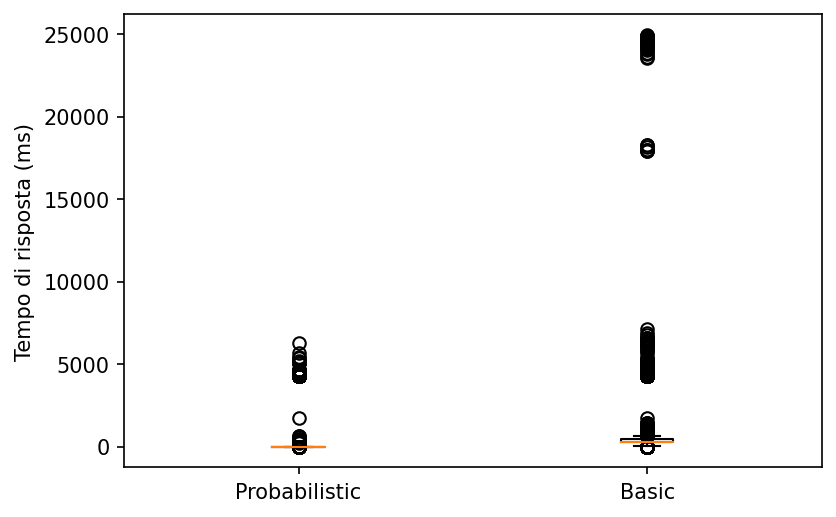

In [81]:
# Box plot for latency
plt.boxplot([success_prob['Latency'], success_basic['Latency']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Tempo di risposta (ms)')
plt.savefig(f'out/{name}-policy.png')
plt.show()

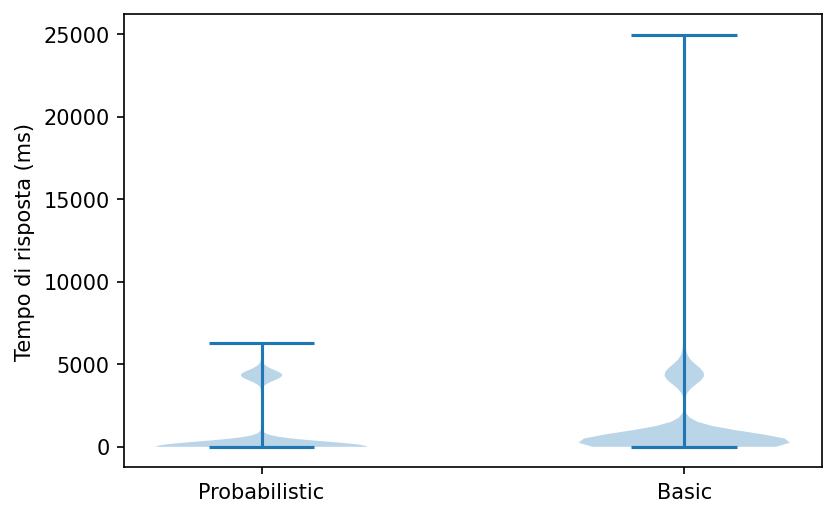

In [82]:
# Violin plot for latency
plt.violinplot([success_prob['Latency'], success_basic['Latency']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Tempo di risposta (ms)')
plt.savefig(f'out/{name}-policy-violin.png')
plt.show()

In [83]:
filtered_prob_t1 = success_prob[success_prob['threadName'].str.contains("ThreadGroup1", na=False)]
filtered_prob_t2 = success_prob[success_prob['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_basic_t1 = success_basic[success_basic['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_basic_t2 = success_basic[success_basic['threadName'].str.contains('ThreadGroup2', na=False)]

In [84]:
#Get only Url
url_1 = filtered_prob_t1['URL'].iloc[0]
fun_name_1 = url_1.split('/')[4]
print(f"Function 1: {fun_name_1}")
if filtered_basic_t2.size > 0:
    url_2 = filtered_basic_t2['URL'].iloc[0]
    fun_name_2 = url_2.split('/')[4]
    print(f"Function 2: {fun_name_2}")

Function 1: fib
Function 2: hash


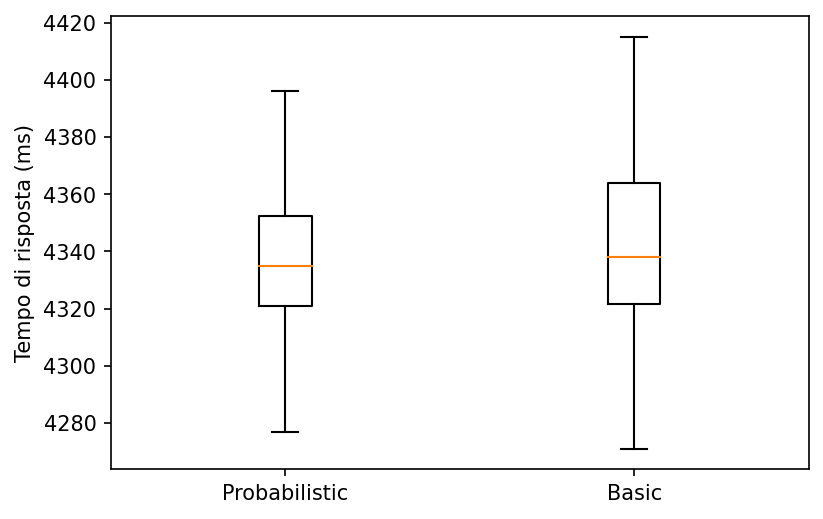

In [85]:
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']], showfliers=False)
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Tempo di risposta (ms)')
#ax.set_title(f'Response time {fun_name_1}')
plt.savefig(f'out/{name}-fib.png')
plt.show()

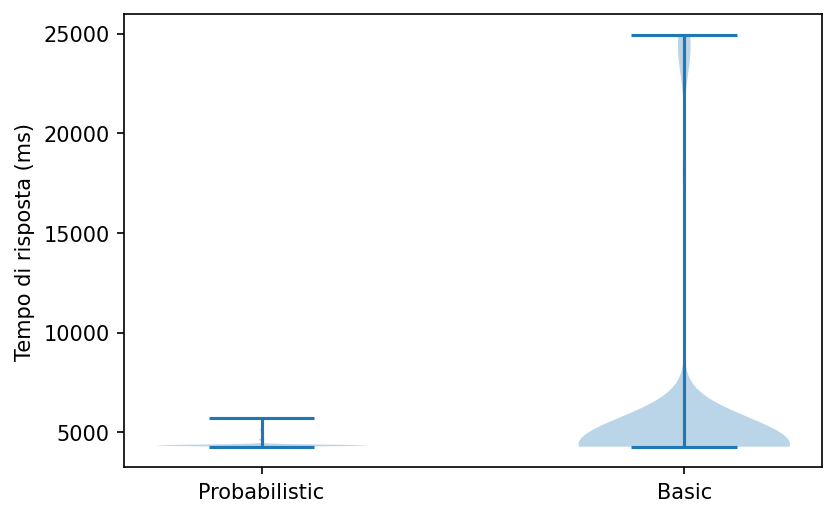

In [86]:
# Violin plot for latency
plt.violinplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Tempo di risposta (ms)')
plt.savefig(f'out/{name}-fib-violin.png')
plt.show()

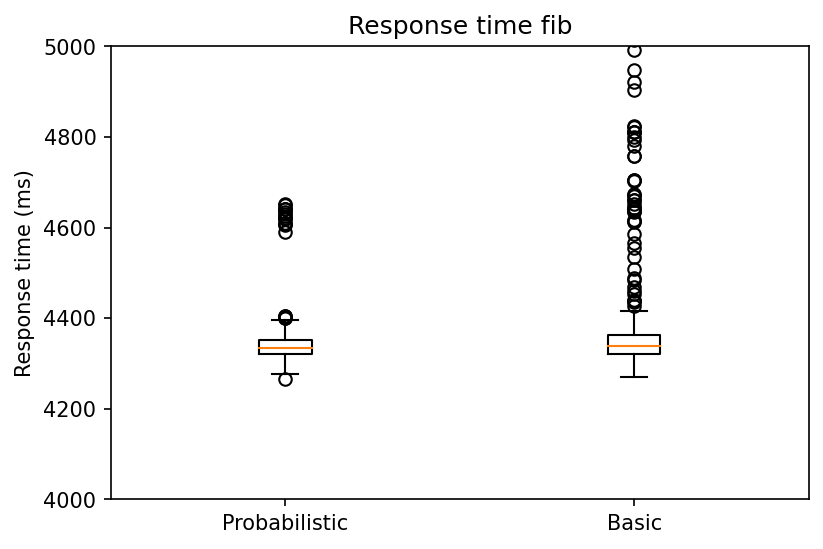

In [87]:
limit = 5000
floor = 4000

fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'],
            filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
ax.set_ylim(floor, limit)
plt.show()

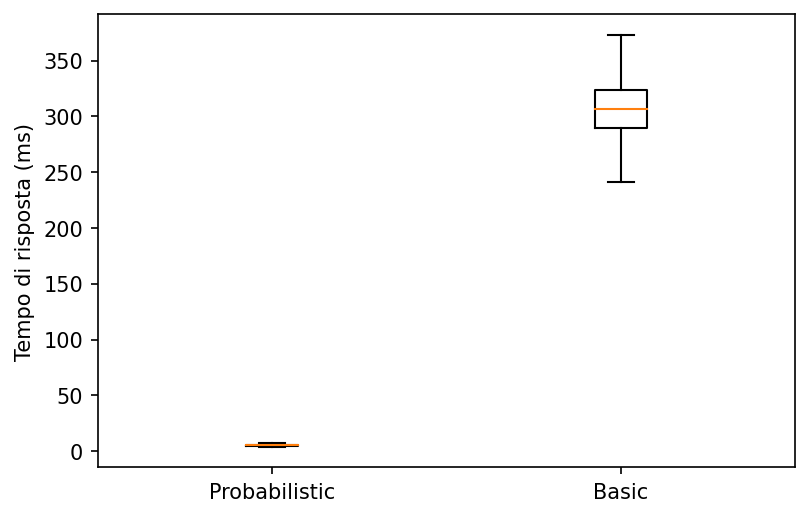

In [88]:
plt.show()
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']], showfliers=False)
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Tempo di risposta (ms)')
#ax.set_title(f'Response time {fun_name_2}')
plt.savefig(f'out/{name}-hash.png')
plt.show()

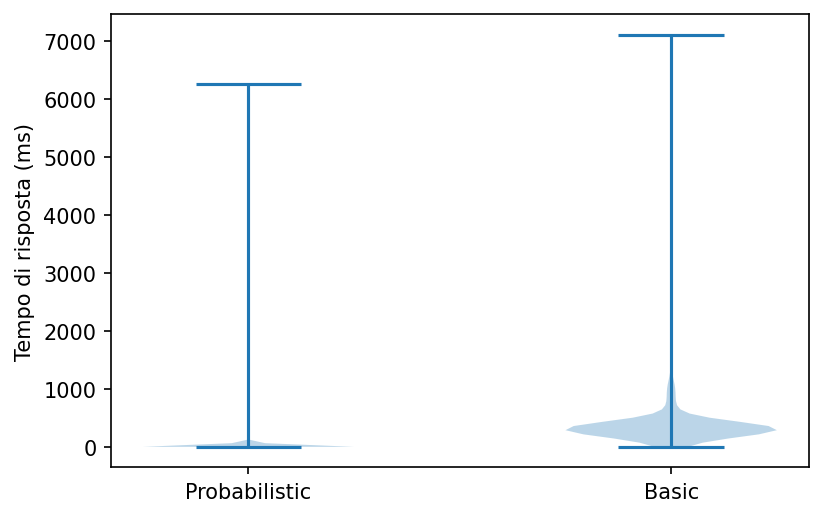

In [89]:
# Violin plot for latency
plt.violinplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Tempo di risposta (ms)')
plt.savefig(f'out/{name}-fib-violin.png')
plt.show()

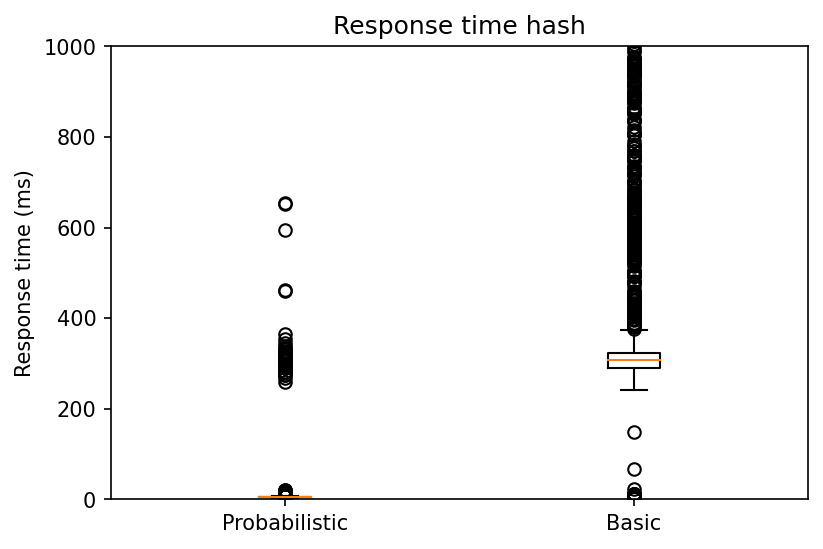

In [90]:
limit = 1000
floor = 0

fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'],
            filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
ax.set_ylim(floor, limit)
plt.show()